In [21]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pyclustertend import hopkins
pd.set_option("display.max_columns", 26)

SyntaxError: invalid syntax (3490289226.py, line 8)

In [12]:
heart = pd.read_csv("heart_attack_prediction_dataset.csv", index_col= ["Patient ID"])
heart.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
heart.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 8763 entries, BMW7812 to ZWN9666
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart P

In [15]:
# Check if there are any missing values
heart.isna().sum()
# There are no missing values

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [5]:
# We can divide column Blood Pressure onto Systolic and Diastolic
heart["Blood_Pressure_Systolic"] = heart["Blood Pressure"].apply(lambda x: x.split("/")[0]).astype("int")
heart["Blood_Pressure_Diastolic"] = heart["Blood Pressure"].apply(lambda x: x.split("/")[1]).astype("int")
del heart["Blood Pressure"]

In [7]:
#Exploration of the data will be soon

<Axes: xlabel='Age', ylabel='Count'>

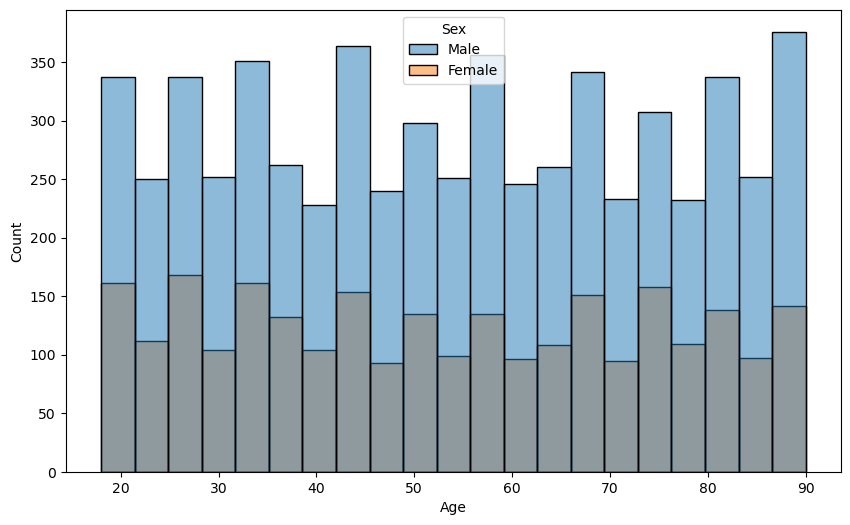

In [17]:
# Distribution of variable age
plt.figure(figsize = (10,6))
sns.histplot(data = heart, x = "Age", hue = "Sex")

<Axes: xlabel='Cholesterol', ylabel='Count'>

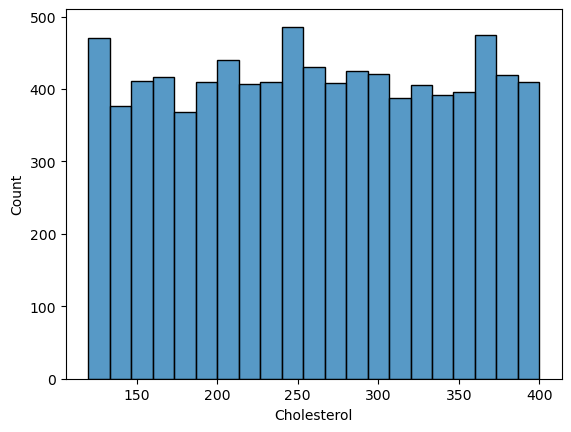

In [19]:
sns.histplot(data = heart , x = "Cholesterol")

In [8]:
# Change variables sex and type of diet to dummy
heart_dummies = pd.get_dummies(data = heart, columns= ["Sex", "Diet"], dtype=int)

In [9]:
# Selecting numeric columns
columns_numeric = list()
for col in heart_dummies.columns:
    if heart_dummies[col].dtype in [int, "int64", float]:
        columns_numeric.append(col)

In [10]:
# Numeric data which can be processed in unsupervised learning processes
heart_numeric = heart_dummies[columns_numeric]

<Axes: >

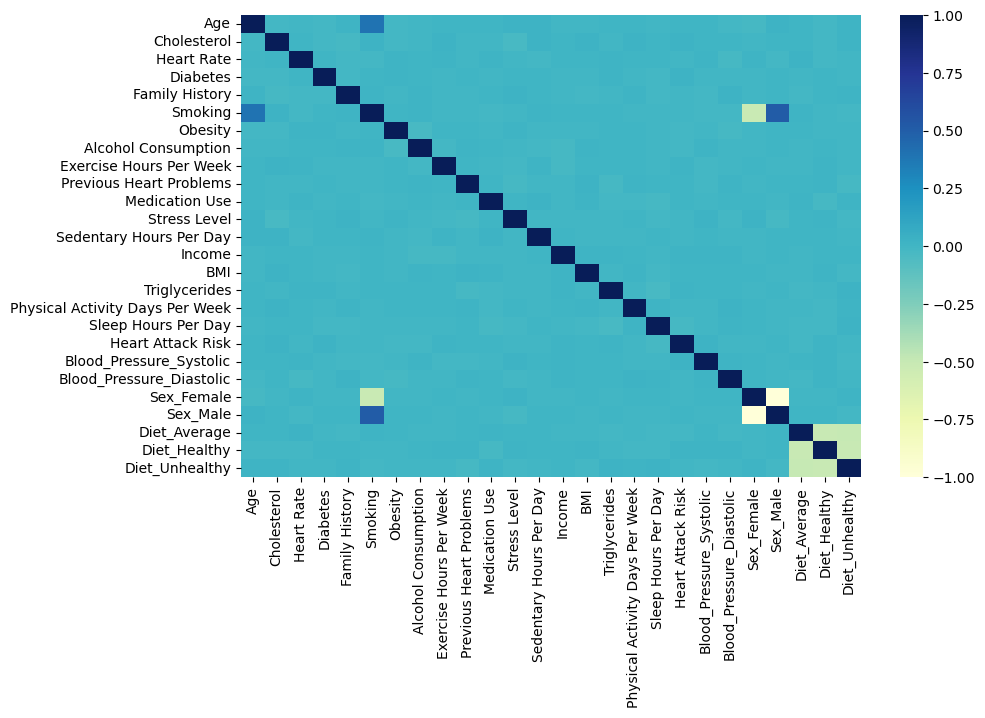

In [11]:
# We plot a heatmap of pearson correlation
plt.figure(figsize = (10,6))
sns.heatmap(heart_numeric.corr(), cmap = "YlGnBu")